<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/LSTMV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jhcool1988/teamdata/master/son2.csv')
df.head()

df1 = df[['ashgls']]
df1.head()

,ashgls
0,0.476190
1,0.476190
2,0.384615
3,0.410959
4,0.410959


     ashgls
0  0.476190
1  0.476190
2  0.384615
3  0.410959
4  0.410959


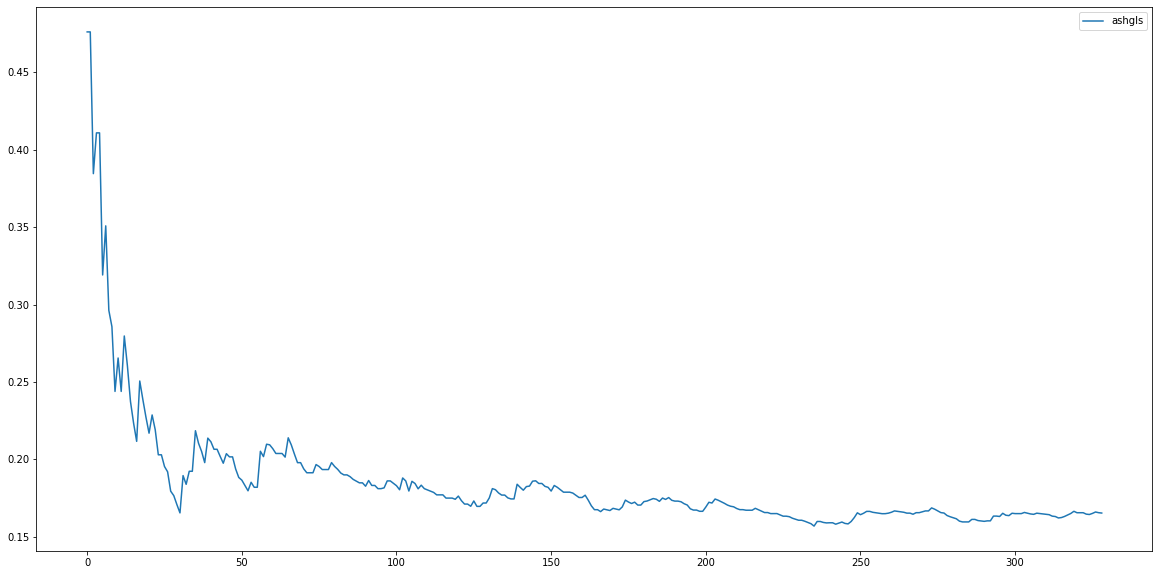

In [2]:
from pandas.tseries.offsets import MonthEnd

# df1 = df1.set_index('idx') 
print(df1.head())
df1.plot(figsize=(20,10))

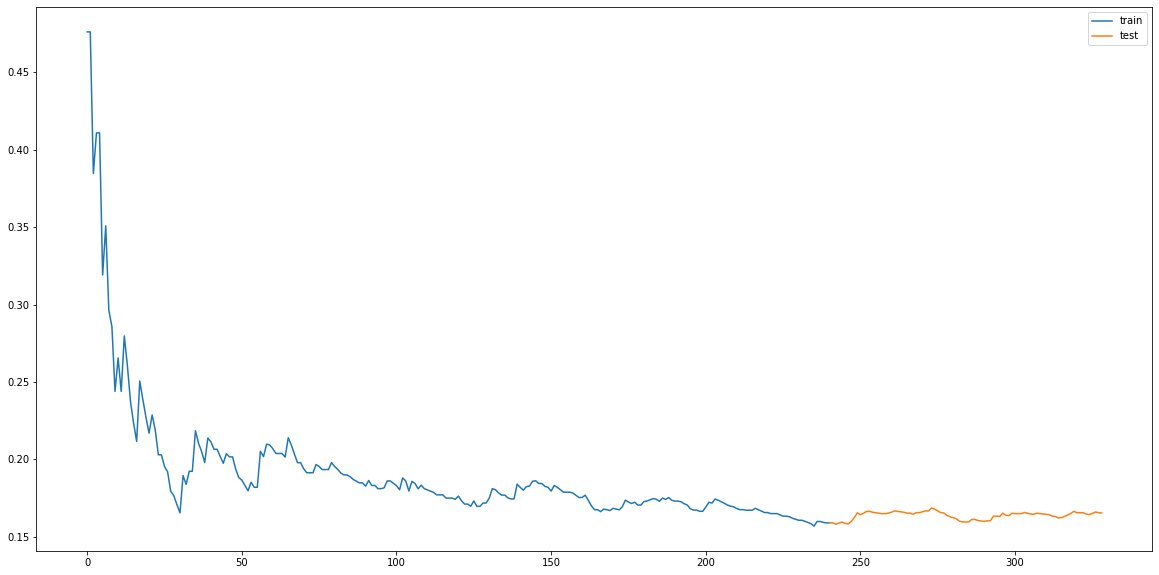

In [3]:
train = df1.loc[:240]
test = df1.loc[240:329]

ax = train.plot()
test.plot(ax=ax, figsize=(20,10))
plt.legend(['train', 'test'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[1.        ],
       [1.        ],
       [0.71320327],
       [0.79570644],
       [0.79570644],
       [0.50817412],
       [0.60754131],
       [0.43660375],
       [0.4034628 ],
       [0.27251561],
       [0.34011372],
       [0.27251561],
       [0.38469065],
       [0.32476652],
       [0.25211582],
       [0.20850511],
       [0.17147611],
       [0.29357437],
       [0.25610814],
       [0.22043434],
       [0.18801064],
       [0.2248737 ],
       [0.19491244],
       [0.14426628],
       [0.14426628],
       [0.12055794],
       [0.10987904],
       [0.07064759],
       [0.06162687],
       [0.04359525],
       [0.02670246],
       [0.10215064],
       [0.08452211],
       [0.11093013],
       [0.11093013],
       [0.19298791],
       [0.16757959],
       [0.15088794],
       [0.12845845],
       [0.17799992],
       [0.1705545 ],
       [0.15544597],
       [0.15544597],
       [0.14101179],
       [0.12720779],
       [0.14650227],
       [0.14007238],
       [0.140

In [5]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
0,1.000000
1,1.000000
2,0.713203
3,0.795706
4,0.795706


In [6]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)
test_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
240,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,0.005382,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,0.004457,0.005382,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN,NaN
247,0.009357,0.004457,0.005382,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN,NaN
248,0.017219,0.009357,0.004457,0.005382,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN,NaN
249,0.026865,0.017219,0.009357,0.004457,0.005382,0.008178,0.006034,0.003858,0.006705,0.006705,NaN,NaN,NaN


In [7]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]


In [8]:
X_train = np.array(X_train)
X_test= np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(229, 12)
[[0.27251561 0.34011372 0.27251561 ... 0.71320327 1.         1.        ]
 [0.38469065 0.27251561 0.34011372 ... 0.79570644 0.71320327 1.        ]
 [0.32476652 0.38469065 0.27251561 ... 0.79570644 0.79570644 0.71320327]
 ...
 [0.00933793 0.00933793 0.         ... 0.01591652 0.01901637 0.02005809]
 [0.00739324 0.00933793 0.00933793 ... 0.01387079 0.01591652 0.01901637]
 [0.00642654 0.00739324 0.00933793 ... 0.01184149 0.01387079 0.01591652]]
(229, 1)
[[0.38469065]
 [0.32476652]
 [0.25211582]
 [0.20850511]
 [0.17147611]
 [0.29357437]
 [0.25610814]
 [0.22043434]
 [0.18801064]
 [0.2248737 ]
 [0.19491244]
 [0.14426628]
 [0.14426628]
 [0.12055794]
 [0.10987904]
 [0.07064759]
 [0.06162687]
 [0.04359525]
 [0.02670246]
 [0.10215064]
 [0.08452211]
 [0.11093013]
 [0.11093013]
 [0.19298791]
 [0.16757959]
 [0.15088794]
 [0.12845845]
 [0.17799992]
 [0.1705545 ]
 [0.15544597]
 [0.15544597]
 [0.14101179]
 [0.12720779]
 [0.14650227]
 [0.14007238]
 [0.14007238]
 [0.11559892]
 [0.09845366]
 [0.0

In [10]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(229, 12, 1)
[[[0.27251561]
  [0.34011372]
  [0.27251561]
  ...
  [0.71320327]
  [1.        ]
  [1.        ]]

 [[0.38469065]
  [0.27251561]
  [0.34011372]
  ...
  [0.79570644]
  [0.71320327]
  [1.        ]]

 [[0.32476652]
  [0.38469065]
  [0.27251561]
  ...
  [0.79570644]
  [0.79570644]
  [0.71320327]]

 ...

 [[0.00933793]
  [0.00933793]
  [0.        ]
  ...
  [0.01591652]
  [0.01901637]
  [0.02005809]]

 [[0.00739324]
  [0.00933793]
  [0.00933793]
  ...
  [0.01387079]
  [0.01591652]
  [0.01901637]]

 [[0.00642654]
  [0.00739324]
  [0.00933793]
  ...
  [0.01184149]
  [0.01387079]
  [0.01591652]]]
[[0.38469065]
 [0.32476652]
 [0.25211582]
 [0.20850511]
 [0.17147611]
 [0.29357437]
 [0.25610814]
 [0.22043434]
 [0.18801064]
 [0.2248737 ]
 [0.19491244]
 [0.14426628]
 [0.14426628]
 [0.12055794]
 [0.10987904]
 [0.07064759]
 [0.06162687]
 [0.04359525]
 [0.02670246]
 [0.10215064]
 [0.08452211]
 [0.11093013]
 [0.11093013]
 [0.19298791]
 [0.16757959]
 [0.15088794]
 [0.12845845]
 [0.177

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = 12
num_classes = 10
batch_size = 1

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train_t, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(X_test_t, y_test))

Train on 229 samples, validate on 77 samples
Epoch 1/5
229/229 [==============================] - 2s 11ms/step - loss: 0.8474 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 2/5
229/229 [==============================] - 2s 8ms/step - loss: 0.8474 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 3/5
229/229 [==============================] - 2s 8ms/step - loss: 0.8474 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 4/5
229/229 [==============================] - 2s 9ms/step - loss: 0.8474 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 5/5
229/229 [==============================] - 2s 9ms/step - loss: 0.8474 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00


In [16]:
preds = model.predict(X_test_t)
plt.figure(figsize=(12,6))
plt.plot(sc.inverse_transform(preds.reshape(-1,1)),
        label='generated',
        color='orange')
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)),
        label='Actual')
plt.legend()
plt.show()

ValueError: ignored